In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

In [5]:
df_dict = {}
candidate = ['SOL','XRP']#['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 00:15:00
Start Value                                     10000.0
Min Value                                   9934.759623
Max Value                                   21713.05048
End Value                                  21185.448604
Total Return [%]                             111.854486
Benchmark Return [%]                         -75.317456
Total Time Exposure [%]                       11.209704
Max Gross Exposure [%]                       100.475172
Max Drawdown [%]                              10.285165
Max Drawdown Duration                 125 days 01:00:00
Total Orders                                        565
Total Fees Paid                             1697.752166
Total Trades                                        283
Win Rate [%]                                  51.236749
Best Trade [%]                                19

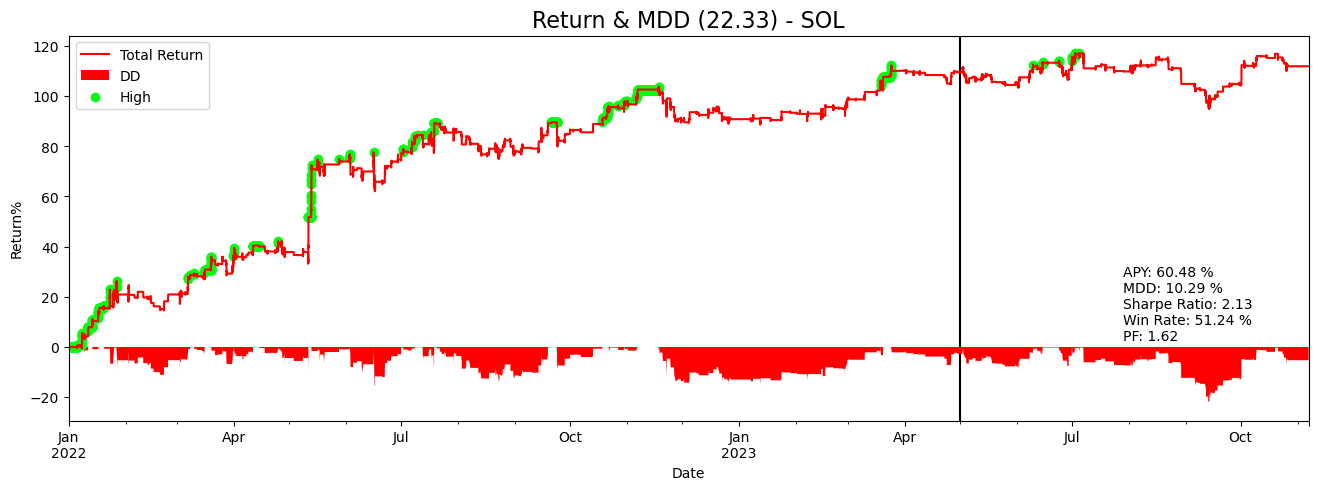

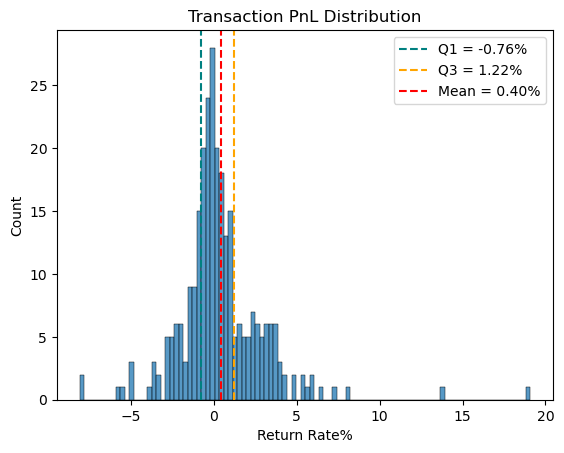

In [28]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# v2
params = {'window_l_k': 96, 'window_l_d': 96, 'window_s_k': 94, 'window_s_d': 78, 'upper_bound': 95}
# sol 1h : 40,48,100,126,95
config = {'freq':'15T', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

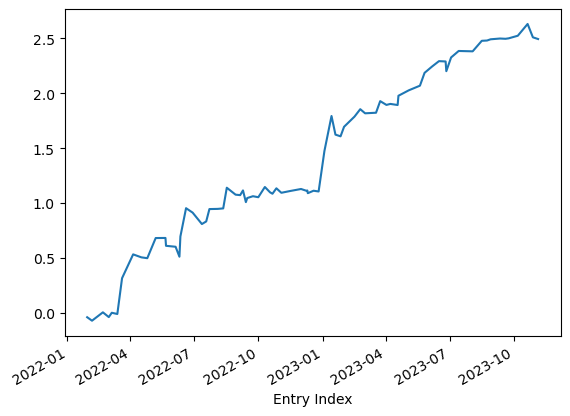

In [39]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  5.2min finished


Optimization time: 312.34 sec
---------- SOL LONG ----------
{'window_l_k': 292, 'window_l_d': 292, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:55:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9687.534018
Max Value                                  16217.684552
End Value                                  15389.107151
Total Return [%]                              53.891072
Benchmark Return [%]                         -87.111841
Total Time Exposure [%]                        1.901149
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              10.469412
Max Drawdown Duration                 172 days 07:35:00
Total Orders                                        198
Total Fees Paid                              595.735065
Total Trades            

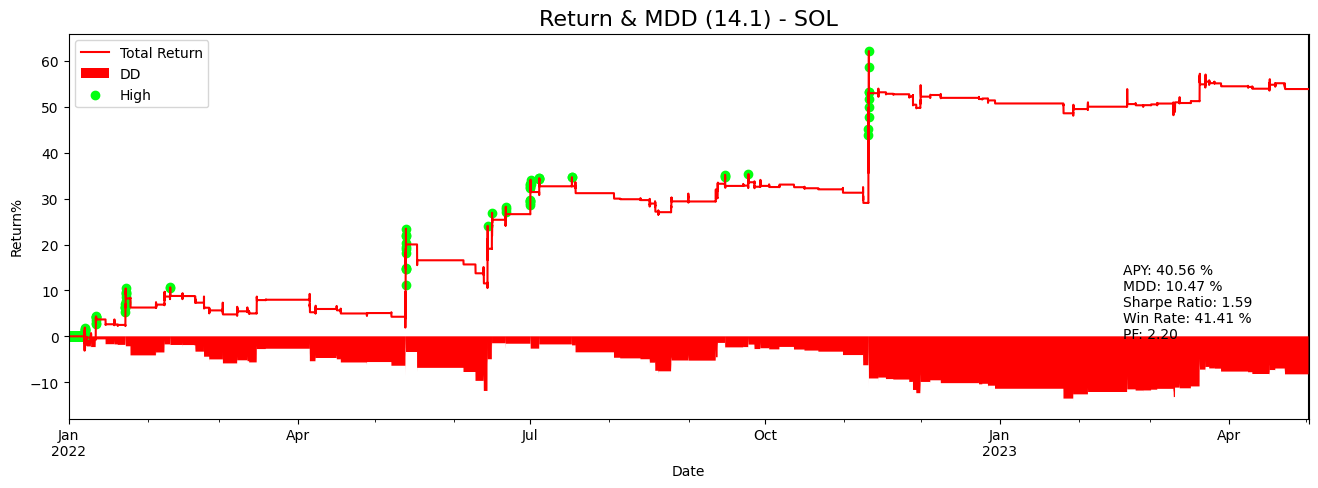

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      7.99 | 1606.75 |  -809.39 |       1.99 |   34.78 |         23 |
| 2022-06    |     23.47 | 3646.87 | -1299.91 |       2.81 |   46.67 |         15 |
| 2022-09    |      1.34 |  847.15 |  -713.41 |       1.19 |   44.44 |         18 |
| 2022-12    |     17.97 | 2756.74 |  -960.03 |       2.87 |   28.57 |         21 |
| 2023-03    |      3.74 |  910.33 |  -536.02 |       1.7  |   58.82 |         17 |
| 2023-06    |     -0.6  |  119.29 |  -179.26 |       0.67 |   40    |          5 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= XRP LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  5.2min finished


Optimization time: 314.95 sec
---------- XRP LONG ----------
{'window_l_k': 208, 'window_l_d': 104, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:55:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9822.397972
Max Value                                  14305.034073
End Value                                  13906.713216
Total Return [%]                              39.067132
Benchmark Return [%]                            -44.231
Total Time Exposure [%]                        4.030207
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               7.248396
Max Drawdown Duration                  87 days 06:00:00
Total Orders                                        483
Total Fees Paid                             1450.340508
Total Trades            

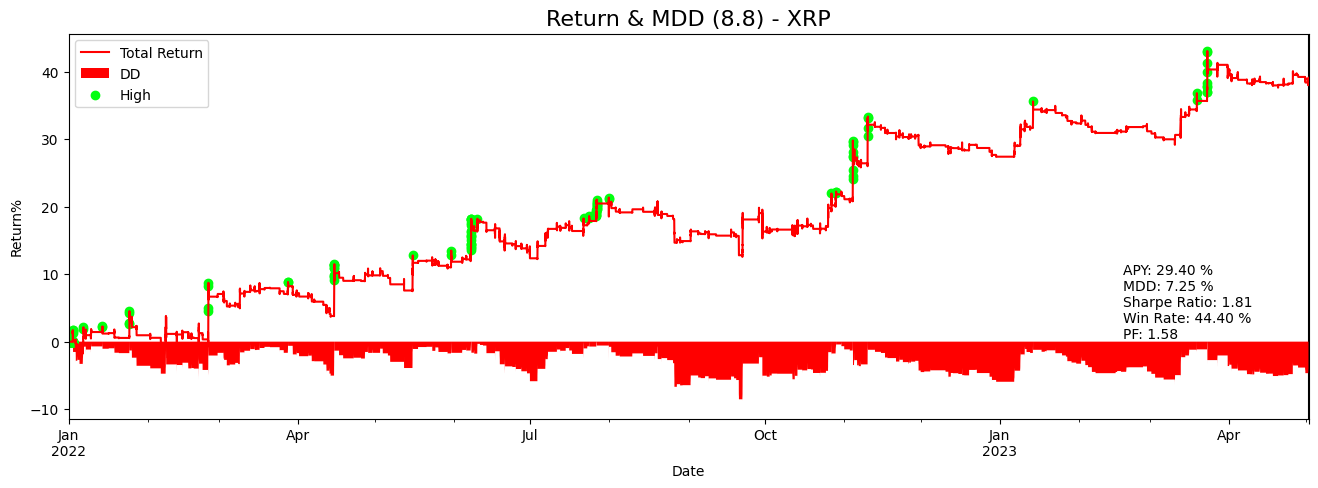

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      7.19 | 2103.02 | -1389.26 |       1.51 |   47.83 |         46 |
| 2022-06    |      5.21 | 2040.74 | -1519.91 |       1.34 |   33.33 |         45 |
| 2022-09    |      3.96 | 1912.7  | -1516.9  |       1.26 |   50    |         40 |
| 2022-12    |     11.09 | 2159.22 | -1049.89 |       2.06 |   43.4  |         53 |
| 2023-03    |     12.24 | 2054.61 |  -830.89 |       2.47 |   50    |         40 |
| 2023-06    |     -0.57 |  266.44 |  -323.17 |       0.82 |   44.44 |         18 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= SOL SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  5.3min finished


Optimization time: 319.02 sec
---------- SOL SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 60, 'window_s_d': 44}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:55:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9872.051758
Max Value                                  30006.835051
End Value                                  26998.920185
Total Return [%]                             169.989202
Benchmark Return [%]                         -87.111841
Total Time Exposure [%]                       42.224651
Max Gross Exposure [%]                       102.612342
Max Drawdown [%]                              24.679228
Max Drawdown Duration                 118 days 18:30:00
Total Orders                                       2044
Total Fees Paid                             6125.061006
Total Trades             

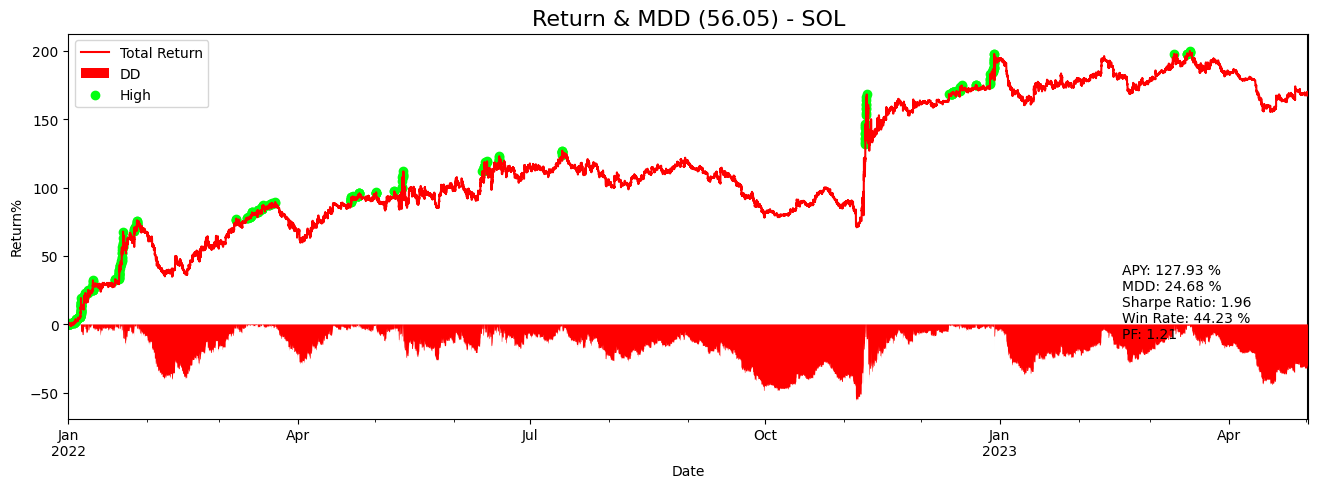

+------------+-----------+----------+-----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |      毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+-----------+------------+---------+------------|
| 2022-03    |     67.24 | 21203.8  | -14479.7  |       1.46 |   49.72 |        179 |
| 2022-06    |     47.64 | 22816.2  | -18051.9  |       1.26 |   43.39 |        189 |
| 2022-09    |    -32.81 | 12668.8  | -15950    |       0.79 |   36.92 |        195 |
| 2022-12    |    111.64 | 23738    | -12573.6  |       1.89 |   47.47 |        198 |
| 2023-03    |    -10.19 | 14947    | -15965.8  |       0.94 |   46.43 |        196 |
| 2023-06    |    -13.54 |  3195.93 |  -4549.83 |       0.7  |   36.92 |         65 |
+------------+-----------+----------+-----------+------------+---------+------------+
======================= XRP SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  5.1min finished


Optimization time: 306.21 sec
---------- XRP SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 284, 'window_s_d': 128}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:55:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9958.400552
Max Value                                  24419.684837
End Value                                  23754.445961
Total Return [%]                              137.54446
Benchmark Return [%]                            -44.231
Total Time Exposure [%]                       42.469707
Max Gross Exposure [%]                       103.673514
Max Drawdown [%]                              17.382412
Max Drawdown Duration                  97 days 11:30:00
Total Orders                                        552
Total Fees Paid                             1651.365975
Total Trades           

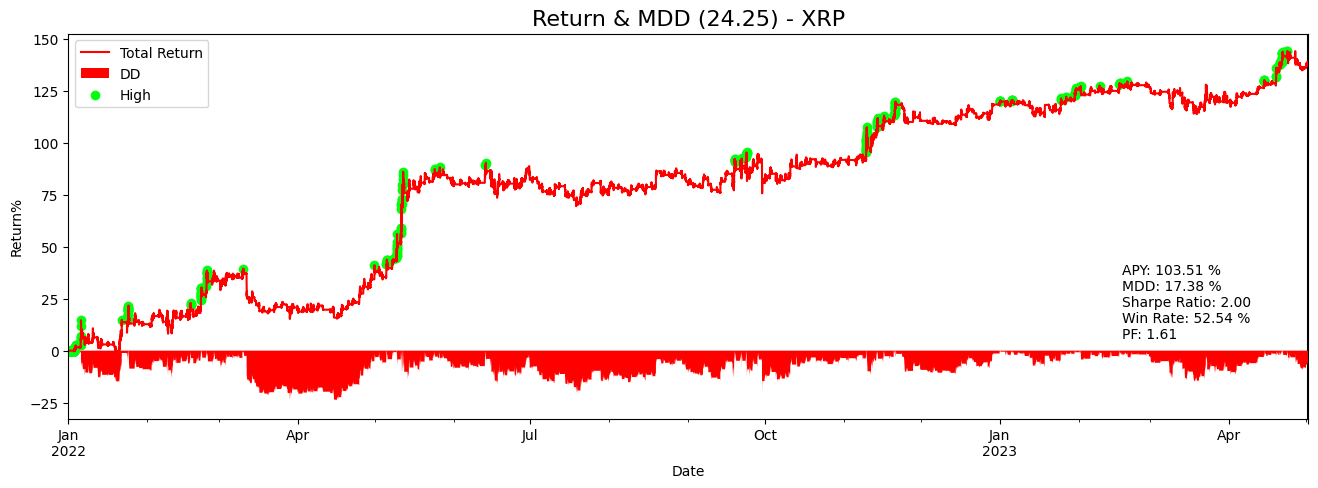

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     18.83 | 7030.53 | -5150.33 |       1.37 |   48.08 |         52 |
| 2022-06    |     63.43 | 9971.14 | -3627.91 |       2.75 |   60.38 |         53 |
| 2022-09    |      1.06 | 5648.63 | -5542.95 |       1.02 |   48.15 |         54 |
| 2022-12    |     36.56 | 6652.85 | -2996.44 |       2.22 |   55.1  |         49 |
| 2023-03    |     -0.03 | 4482.7  | -4485.92 |       1    |   45.1  |         51 |
| 2023-06    |     17.72 | 2540.06 |  -767.92 |       3.31 |   70.59 |         17 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------5T is done----------------------
======================= SOL LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  2.0min finished


Optimization time: 120.39 sec
---------- SOL LONG ----------
{'window_l_k': 276, 'window_l_d': 284, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:45:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9672.196262
Max Value                                  12788.945344
End Value                                  12641.749281
Total Return [%]                              26.417493
Benchmark Return [%]                         -87.147873
Total Time Exposure [%]                        1.165981
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               8.329929
Max Drawdown Duration                 299 days 03:00:00
Total Orders                                         48
Total Fees Paid                              144.367883
Total Trades            

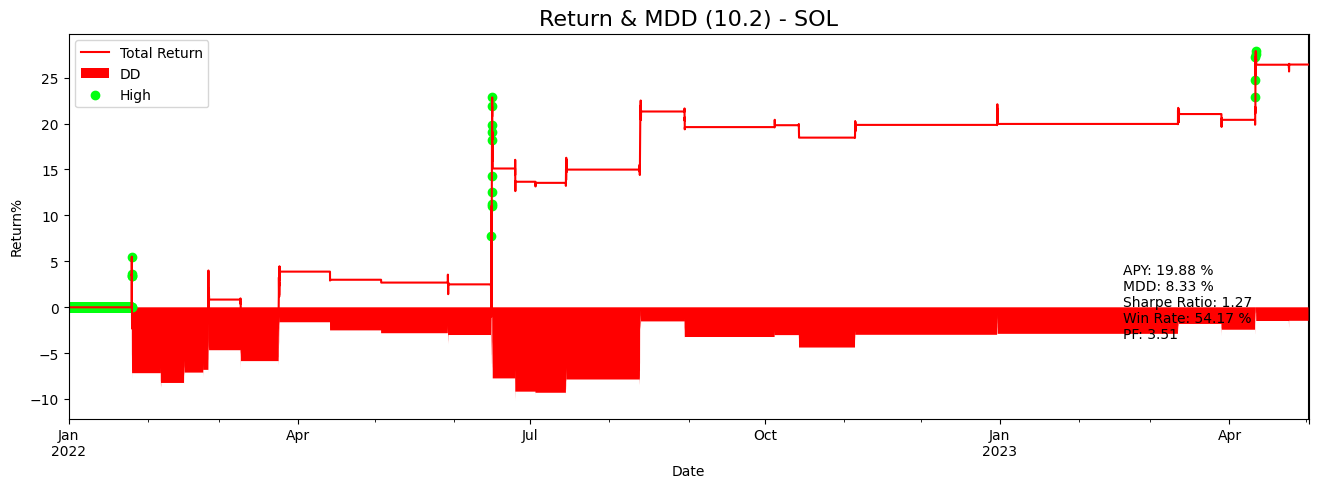

+------------+-----------+---------+---------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |    毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+---------+------------+---------+------------|
| 2022-03    |      3.94 |  779.11 | -390.9  |       1.99 |   57.14 |          7 |
| 2022-06    |      9.78 | 1260.94 | -282.89 |       4.46 |   20    |          5 |
| 2022-09    |      5.95 |  776.52 | -181.76 |       4.27 |   50    |          4 |
| 2022-12    |      0.34 |  169.59 | -135.18 |       1.25 |   75    |          4 |
| 2023-03    |      0.45 |  107.65 |  -62.93 |       1.71 |   50    |          2 |
| 2023-06    |      6.02 |  601.6  |    0    |     inf    |  100    |          2 |
+------------+-----------+---------+---------+------------+---------+------------+
======================= XRP LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  2.2min finished


Optimization time: 133.64 sec
---------- XRP LONG ----------
{'window_l_k': 104, 'window_l_d': 196, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:45:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9393.080138
Max Value                                   12962.28338
End Value                                  12677.240342
Total Return [%]                              26.772403
Benchmark Return [%]                         -44.206731
Total Time Exposure [%]                        2.726337
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               7.814547
Max Drawdown Duration                 172 days 02:15:00
Total Orders                                        116
Total Fees Paid                              346.394921
Total Trades            

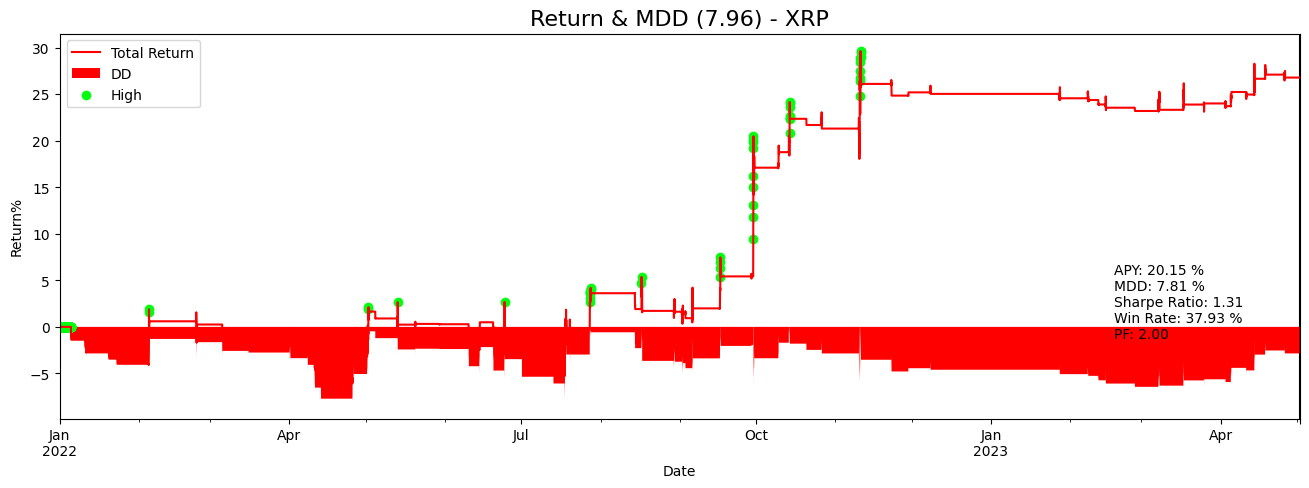

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     -0.73 |  456.02 |  -542.34 |       0.84 |   12.5  |          8 |
| 2022-06    |      0.33 | 1083.94 | -1075.76 |       1.01 |   35.71 |         14 |
| 2022-09    |     17.96 | 2317.9  |  -530.35 |       4.37 |   42.86 |         14 |
| 2022-12    |      7.93 | 1039.65 |  -247.07 |       4.21 |   50    |          8 |
| 2023-03    |     -1.03 |   80.91 |  -183.57 |       0.44 |   37.5  |          8 |
| 2023-06    |      2.78 |  365.93 |   -88.01 |       4.16 |   50    |          6 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= SOL SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  2.1min finished


Optimization time: 129.19 sec
---------- SOL SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 240, 'window_s_d': 180}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:45:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9482.957682
Max Value                                  28047.275526
End Value                                  26701.743261
Total Return [%]                             167.017433
Benchmark Return [%]                         -87.147873
Total Time Exposure [%]                        41.22085
Max Gross Exposure [%]                       124.984157
Max Drawdown [%]                              24.108491
Max Drawdown Duration                 107 days 23:30:00
Total Orders                                        155
Total Fees Paid                              459.585034
Total Trades           

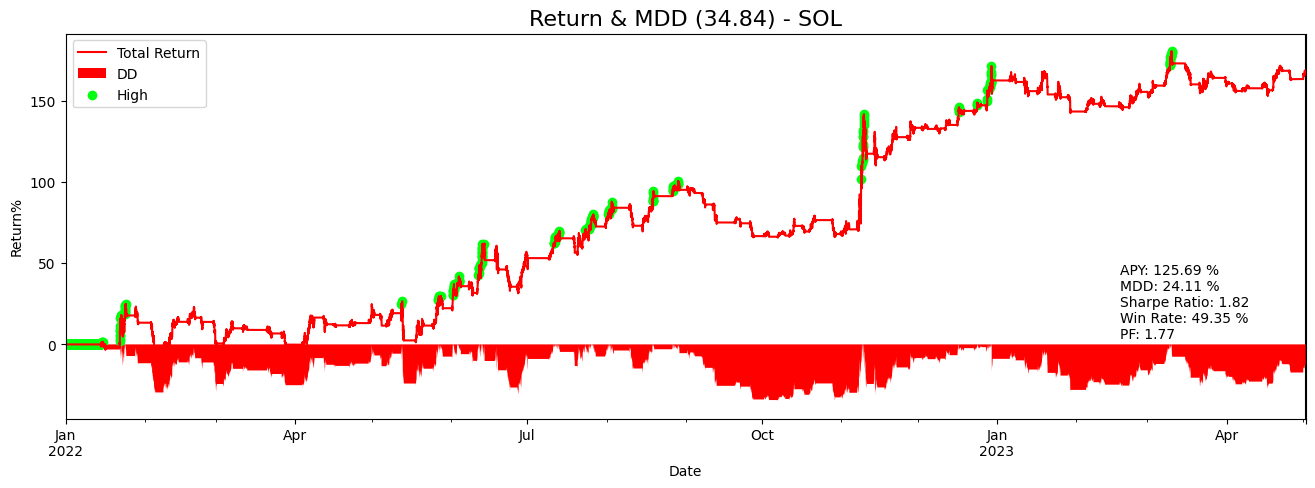

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |      1.05 |  4970.84 | -4985.6  |       1    |   33.33 |         12 |
| 2022-06    |     53.26 | 10183    | -4860.02 |       2.1  |   56.25 |         16 |
| 2022-09    |     13.54 |  6377.05 | -5022.98 |       1.27 |   46.15 |         13 |
| 2022-12    |     95.76 | 11094.5  | -1518.72 |       7.31 |   70.59 |         17 |
| 2023-03    |     -1.88 |  3567.86 | -3756.15 |       0.95 |   35.71 |         14 |
| 2023-06    |      6.52 |  1746.51 | -1094.56 |       1.6  |   50    |          6 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= XRP SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  2.1min finished


Optimization time: 128.64 sec
---------- XRP SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 108, 'window_s_d': 40}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:45:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9765.257247
Max Value                                  26175.805801
End Value                                  25463.514588
Total Return [%]                             154.635146
Benchmark Return [%]                         -44.206731
Total Time Exposure [%]                       42.948388
Max Gross Exposure [%]                       105.198228
Max Drawdown [%]                              13.674986
Max Drawdown Duration                  82 days 06:45:00
Total Orders                                        561
Total Fees Paid                             1677.773734
Total Trades            

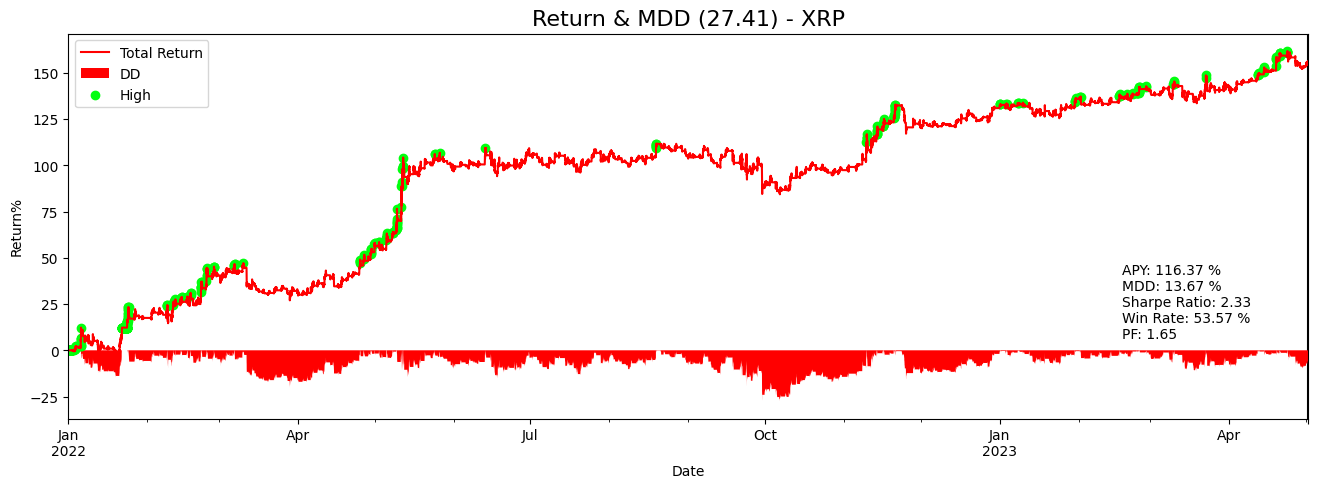

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     30.33 |  7627.21 | -4618.13 |       1.65 |   45.45 |         55 |
| 2022-06    |     75.33 | 10840.9  | -3307.69 |       3.28 |   64.29 |         56 |
| 2022-09    |    -14.71 |  5875.88 | -7346.8  |       0.8  |   42.86 |         56 |
| 2022-12    |     41.93 |  7586.6  | -3393.82 |       2.24 |   59.18 |         49 |
| 2023-03    |      8.31 |  4943.1  | -4111.67 |       1.2  |   53.06 |         49 |
| 2023-06    |     13.68 |  2039.76 |  -671.77 |       3.04 |   68.75 |         16 |
+------------+-----------+----------+----------+------------+---------+------------+
-------------------15T is done----------------------
======================= SOL LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1237 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 1682 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 2209 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 3505 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.6min finished


Optimization time: 95.91 sec
---------- SOL LONG ----------
{'window_l_k': 276, 'window_l_d': 36, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:30:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9549.512694
Max Value                                  21351.020075
End Value                                  19568.943055
Total Return [%]                              95.689431
Benchmark Return [%]                         -87.184744
Total Time Exposure [%]                       22.080761
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              15.638875
Max Drawdown Duration                 105 days 17:00:00
Total Orders                                        272
Total Fees Paid                              819.040961
Total Trades              

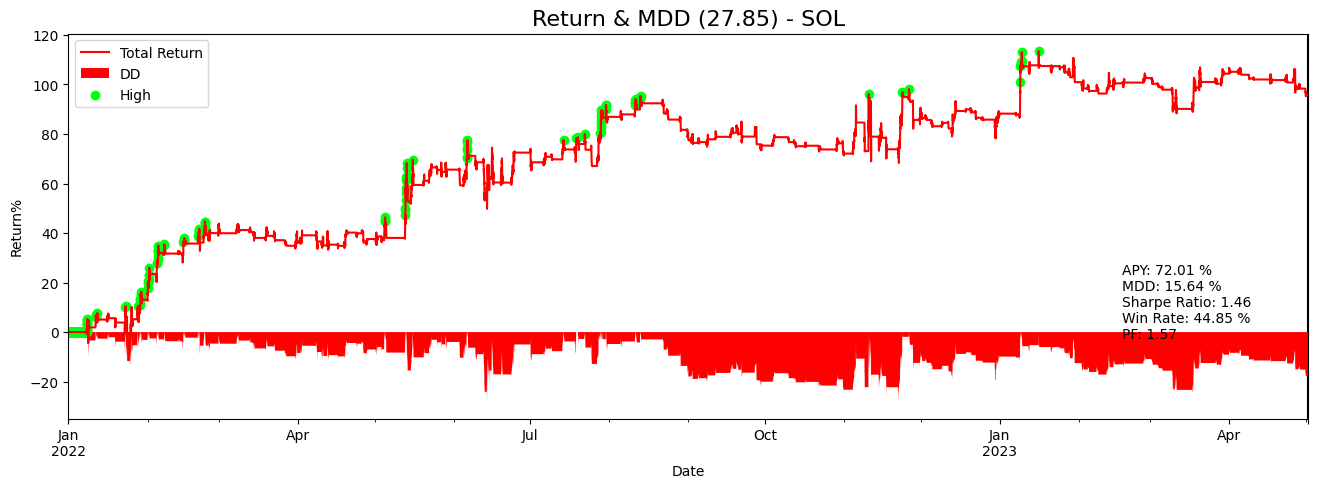

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     36.23 | 5056.67 | -1441.26 |       3.51 |   60.87 |         23 |
| 2022-06    |     36.34 | 7349.81 | -3715.65 |       1.98 |   51.85 |         27 |
| 2022-09    |      2.82 | 4023.5  | -3741.09 |       1.08 |   46.15 |         26 |
| 2022-12    |     12.91 | 5779.48 | -4488.82 |       1.29 |   42.31 |         26 |
| 2023-03    |     16.9  | 4179.75 | -2489.44 |       1.68 |   38.46 |         26 |
| 2023-06    |     -9.44 |    0    |  -944.02 |       0    |    0    |          8 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= XRP LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.7min finished


Optimization time: 102.55 sec
---------- XRP LONG ----------
{'window_l_k': 240, 'window_l_d': 136, 'window_s_k': 36, 'window_s_d': 36}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:30:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  14601.470908
End Value                                  14345.774263
Total Return [%]                              43.457743
Benchmark Return [%]                         -44.275084
Total Time Exposure [%]                        3.965192
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                               7.519036
Max Drawdown Duration                 195 days 11:00:00
Total Orders                                         64
Total Fees Paid                              193.359941
Total Trades            

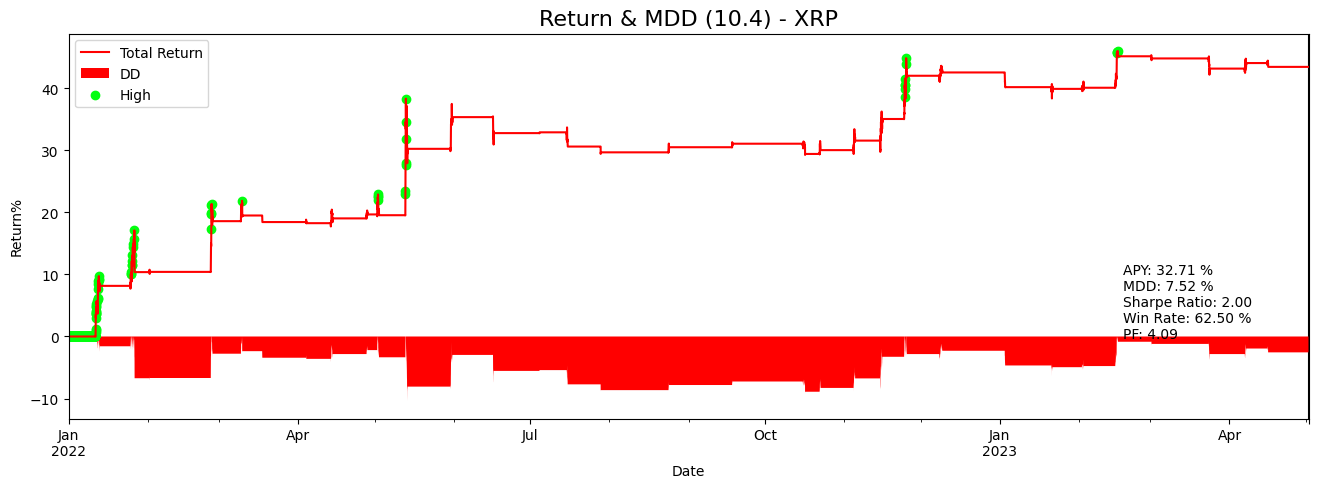

+------------+-----------+---------+---------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |    毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+---------+------------+---------+------------|
| 2022-03    |     18.45 | 1950.38 | -105.83 |      18.43 |   83.33 |          6 |
| 2022-06    |     14.34 | 1721.96 | -288.2  |       5.97 |   57.14 |          7 |
| 2022-09    |     -1.71 |  151.8  | -322.64 |       0.47 |   60    |          5 |
| 2022-12    |     11.49 | 1313.66 | -165.04 |       7.96 |   83.33 |          6 |
| 2023-03    |      0.62 |  525.34 | -463.31 |       1.13 |   33.33 |          6 |
| 2023-06    |      0.28 |   89.47 |  -61.81 |       1.45 |   50    |          2 |
+------------+-----------+---------+---------+------------+---------+------------+
======================= SOL SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.7min finished


Optimization time: 103.75 sec
---------- SOL SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 288, 'window_s_d': 140}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:30:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9394.878399
Max Value                                  29784.766134
End Value                                  28965.372096
Total Return [%]                             189.653721
Benchmark Return [%]                         -87.184744
Total Time Exposure [%]                       39.943416
Max Gross Exposure [%]                       108.290709
Max Drawdown [%]                              15.267051
Max Drawdown Duration                  70 days 13:00:00
Total Orders                                         90
Total Fees Paid                              263.994917
Total Trades           

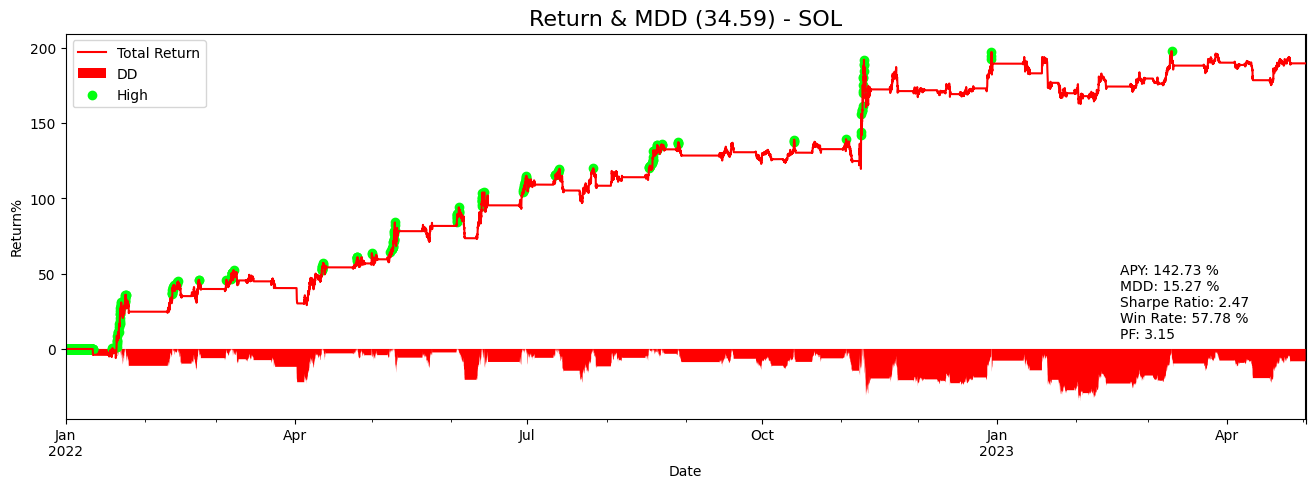

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     41.6  | 4938    |  -894.41 |       5.52 |   57.14 |          7 |
| 2022-06    |     68.71 | 8706.46 | -1835.68 |       4.74 |   77.78 |          9 |
| 2022-09    |     16.86 | 2953.79 | -1267.71 |       2.33 |   57.14 |          7 |
| 2022-12    |     63.46 | 7501.2  | -1155.32 |       6.49 |   66.67 |          9 |
| 2023-03    |      0.67 | 2567.71 | -2501.17 |       1.03 |   40    |         10 |
| 2023-06    |     -0.48 | 1117.26 | -1164.76 |       0.96 |   33.33 |          3 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= XRP SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.6min finished


Optimization time: 95.41 sec
---------- XRP SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 204, 'window_s_d': 136}
Start                         2022-01-01 00:00:00
End                           2023-05-01 23:30:00
Period                          486 days 00:00:00
Start Value                               10000.0
Min Value                             9908.144393
Max Value                            22971.909149
End Value                            20643.121897
Total Return [%]                       106.431219
Benchmark Return [%]                   -44.275084
Total Time Exposure [%]                 41.615226
Max Gross Exposure [%]                 101.793605
Max Drawdown [%]                        13.311659
Max Drawdown Duration           173 days 00:30:00
Total Orders                                  101
Total Fees Paid                        299.704328
Total Trades                                   51
Win Rate [%]                                 50.0
Best Trade [%]

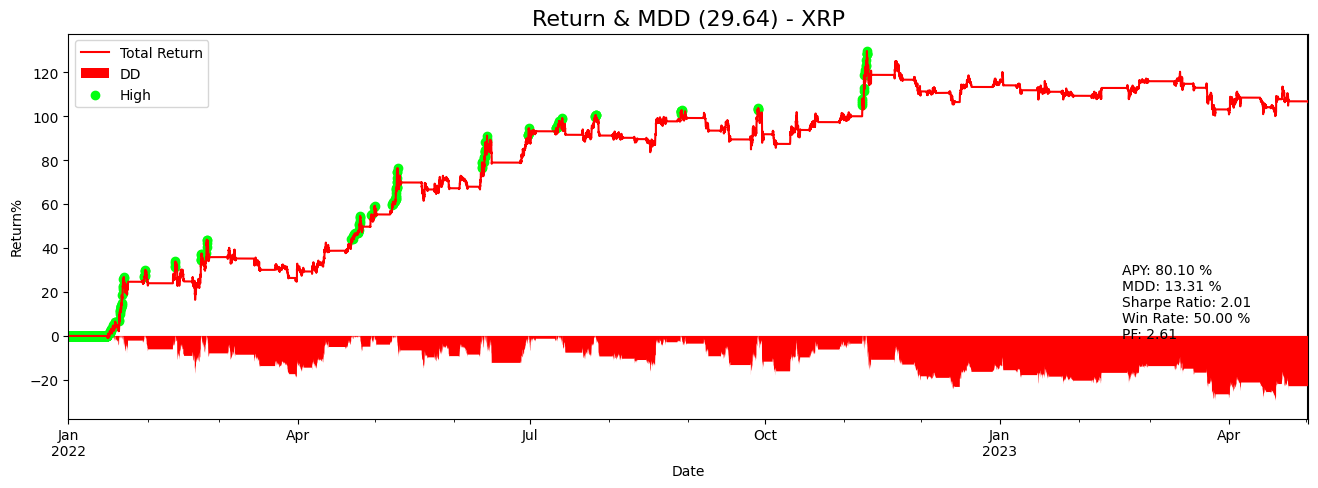

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     29.36 | 3949.55 | -1014.04 |       3.89 |   50    |          8 |
| 2022-06    |     63.84 | 6701.08 |  -317.5  |      21.11 |   88.89 |          9 |
| 2022-09    |     -1.35 | 1197.13 | -1331.68 |       0.9  |   33.33 |          9 |
| 2022-12    |     22.26 | 3903.44 | -1677.44 |       2.33 |   54.55 |         11 |
| 2023-03    |     -5.6  | 1201.06 | -1760.77 |       0.68 |   30    |         10 |
| 2023-06    |     -2.08 |  364.41 |  -572.11 |       0.64 |   25    |          4 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------30T is done----------------------
======================= SOL LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.5min finished


Optimization time: 87.19 sec
---------- SOL LONG ----------
{'window_l_k': 204, 'window_l_d': 284, 'window_s_k': 36, 'window_s_d': 36}
Start                         2022-01-01 00:00:00
End                           2023-05-01 23:00:00
Period                          486 days 00:00:00
Start Value                               10000.0
Min Value                             9338.056045
Max Value                            13400.874419
End Value                            13298.746196
Total Return [%]                        32.987462
Benchmark Return [%]                   -87.261021
Total Time Exposure [%]                  2.486283
Max Gross Exposure [%]                      100.0
Max Drawdown [%]                         8.636582
Max Drawdown Duration           171 days 20:00:00
Total Orders                                   20
Total Fees Paid                         60.285356
Total Trades                                   10
Win Rate [%]                                 60.0
Best Trade [%] 

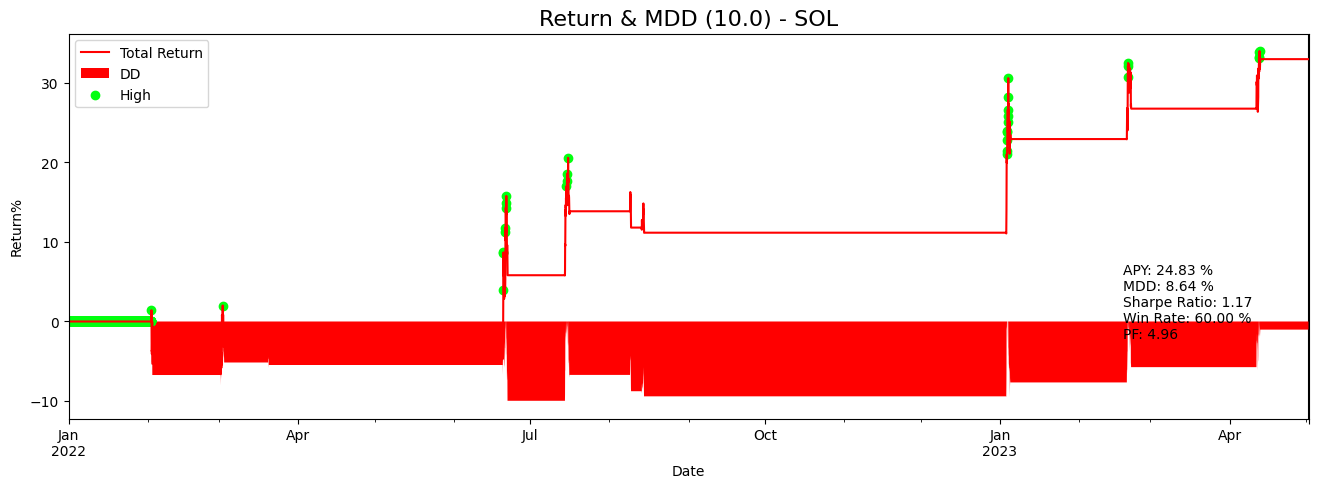

+------------+-----------+---------+---------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |    毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+---------+------------+---------+------------|
| 2022-03    |     -3.35 |  216.73 | -562.89 |       0.39 |   33.33 |          3 |
| 2022-06    |      9.61 |  927.89 |    0    |     inf    |  100    |          1 |
| 2022-09    |      5.35 |  804.17 | -269.39 |       2.99 |   33.33 |          3 |
| 2022-12    |      0    |    0    |    0    |     nan    |  nan    |          0 |
| 2023-03    |     15.6  | 1559.74 |    0    |     inf    |  100    |          2 |
| 2023-06    |      6.22 |  622.5  |    0    |     inf    |  100    |          1 |
+------------+-----------+---------+---------+------------+---------+------------+
======================= XRP LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.5min finished


Optimization time: 89.4 sec
---------- XRP LONG ----------
{'window_l_k': 284, 'window_l_d': 208, 'window_s_k': 36, 'window_s_d': 36}
Start                         2022-01-01 00:00:00
End                           2023-05-01 23:00:00
Period                          486 days 00:00:00
Start Value                               10000.0
Min Value                             9658.425643
Max Value                            12022.517564
End Value                            11914.832643
Total Return [%]                        19.148326
Benchmark Return [%]                   -44.744995
Total Time Exposure [%]                    2.1262
Max Gross Exposure [%]                      100.0
Max Drawdown [%]                         3.458824
Max Drawdown Duration           103 days 17:00:00
Total Orders                                   18
Total Fees Paid                         54.398573
Total Trades                                    9
Win Rate [%]                            77.777778
Best Trade [%]  

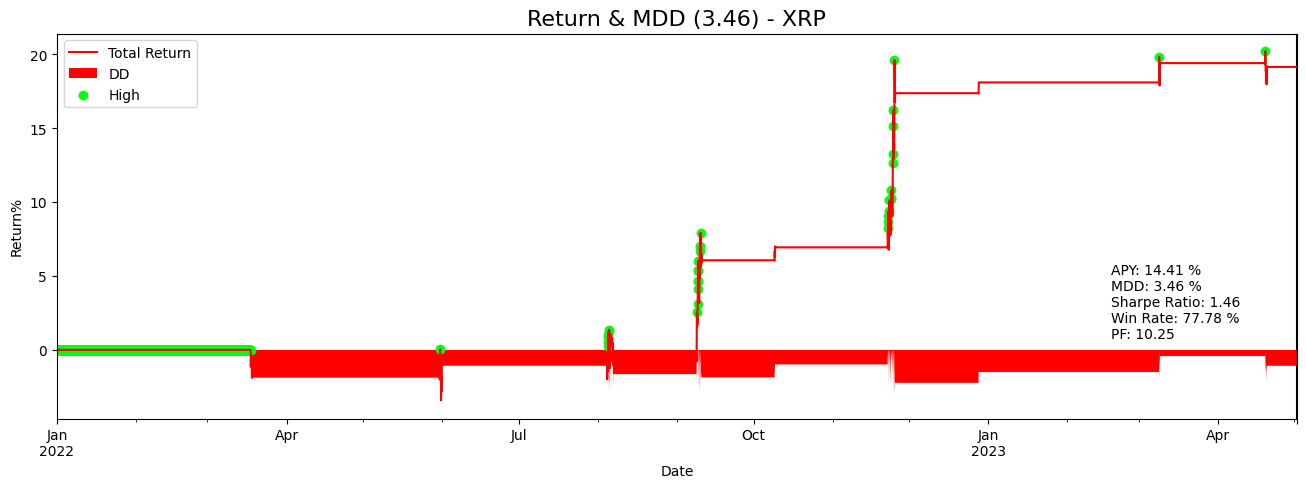

+------------+-----------+---------+---------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |    毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+---------+------------+---------+------------|
| 2022-03    |     -1.81 |    0    | -180.91 |          0 |       0 |          1 |
| 2022-06    |      0.83 |   81.18 |    0    |        inf |     100 |          1 |
| 2022-09    |      7.09 |  706.25 |    0    |        inf |     100 |          2 |
| 2022-12    |     12.03 | 1203.46 |    0    |        inf |     100 |          3 |
| 2023-03    |      1.31 |  130.98 |    0    |        inf |     100 |          1 |
| 2023-06    |     -0.26 |    0    |  -26.13 |          0 |       0 |          1 |
+------------+-----------+---------+---------+------------+---------+------------+
======================= SOL SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2017 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 3313 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4082 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.4min finished


Optimization time: 83.99 sec
---------- SOL SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 136, 'window_s_d': 76}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9587.942459
Max Value                                  32727.555418
End Value                                  30835.518113
Total Return [%]                             208.355181
Benchmark Return [%]                         -87.261021
Total Time Exposure [%]                       39.429012
Max Gross Exposure [%]                       104.562738
Max Drawdown [%]                              11.520688
Max Drawdown Duration                 123 days 03:00:00
Total Orders                                         88
Total Fees Paid                              257.554286
Total Trades             

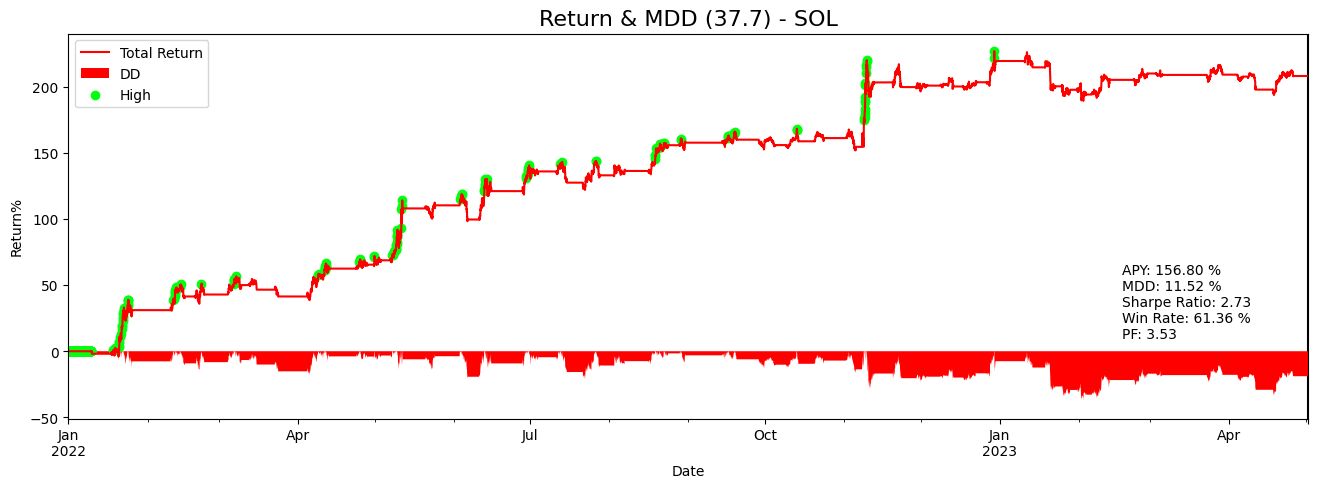

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     42.11 |  5195.71 | -1050.21 |       4.95 |   57.14 |          7 |
| 2022-06    |     94.67 | 10539.1  | -1072.08 |       9.83 |   87.5  |          8 |
| 2022-09    |     19.96 |  3252.37 | -1256.37 |       2.59 |   71.43 |          7 |
| 2022-12    |     63.64 |  7445.05 | -1080.71 |       6.89 |   70    |         10 |
| 2023-03    |    -10.33 |  1610.62 | -2643.64 |       0.61 |   33.33 |          9 |
| 2023-06    |     -1.04 |  1028.2  | -1132.5  |       0.91 |   33.33 |          3 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= XRP SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 363 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1013 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 1985 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 2592 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 3281 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 4050 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  1.3min finished


Optimization time: 76.15 sec
---------- XRP SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 104, 'window_s_d': 72}
Start                               2022-01-01 00:00:00
End                                 2023-05-01 23:00:00
Period                                486 days 00:00:00
Start Value                                     10000.0
Min Value                                   9922.319543
Max Value                                  22146.823553
End Value                                  20819.312019
Total Return [%]                              108.19312
Benchmark Return [%]                         -44.744995
Total Time Exposure [%]                       40.920782
Max Gross Exposure [%]                       101.505321
Max Drawdown [%]                              15.021938
Max Drawdown Duration                 173 days 01:00:00
Total Orders                                         94
Total Fees Paid                              278.668806
Total Trades             

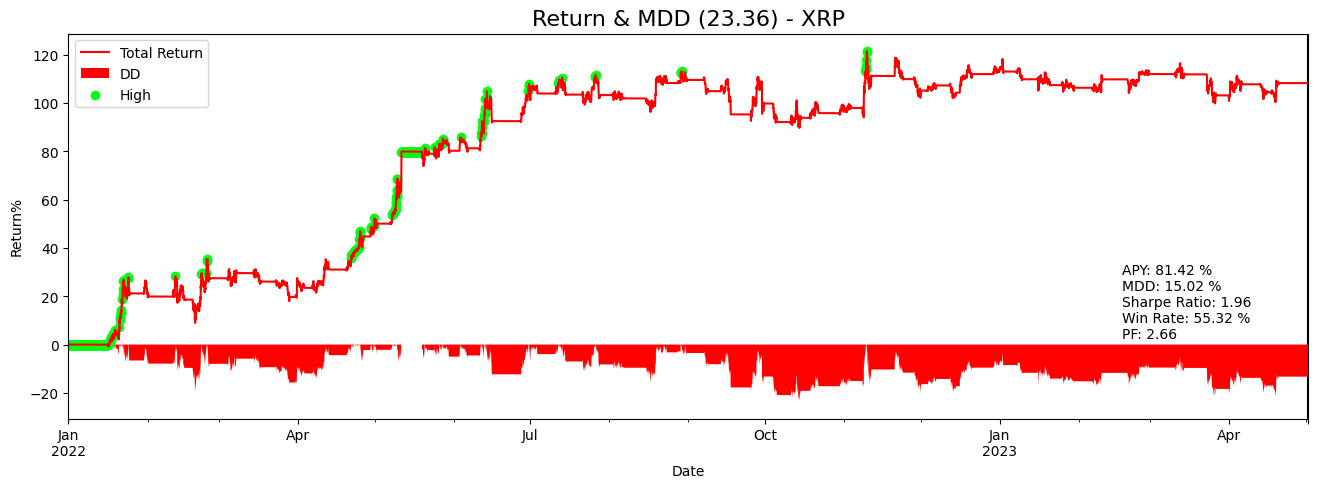

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     23.48 | 3589.74 | -1242.41 |       2.89 |   50    |          8 |
| 2022-06    |     80.43 | 8129.75 |   -86.45 |      94.04 |   88.89 |          9 |
| 2022-09    |     -4.14 | 1215.56 | -1629.99 |       0.75 |   37.5  |          8 |
| 2022-12    |     13.23 | 2994.2  | -1671.06 |       1.79 |   63.64 |         11 |
| 2023-03    |     -5.3  | 1022.78 | -1552.83 |       0.66 |   33.33 |          9 |
| 2023-06    |      0.5  |  371.14 |  -321.13 |       1.16 |   50    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------


In [3]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['SOL','XRP']
sample_sets = [[start,end]]

for freq in ['5T','15T','30T','1h']:
    for direction in ['long','short']:
        params={
            'window_l_k': [36, 296, 4],
            'window_l_d': [36, 296, 4],
            'window_s_k': [36, 296, 4],
            'window_s_d': [36, 296, 4]}
        if direction == 'long':
            params['window_s_k'] = [36,37,1]
            params['window_s_d'] = [36,37,1]
        else:
            params['window_l_d'] = [36,37,1]
            params['window_l_k'] = [36,37,1]    
        config = {'freq':freq,'fee': 0.0003}
        multi_test = MultiTester(
            Strategy,
            get_data_func=get_data,
            params=params,
            config=config,
            symbol_list=symbol_list,
            start=start,
            end=end
            )

        all_params = multi_test.multi_params(symbol_list,sample_sets,direction=direction)
        trades, value_df = multi_test.multi_params_result(all_params)
        # multi_test.save_version_result(all_params,value_df,trades,1)
    print(f'-------------------{freq} is done----------------------')